In [1]:
card_type = "Spades"
model = "lstm"

In [2]:
# Parameters
card_type = "Clubs"
model = "nn"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
n_outputs = 8
n_features = 8
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [7]:
spades_test_chance = test_chance[['Date',card_type]]
spades_test_chance = pd.merge(dummies,spades_test_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")

spades_train_chance = train_chance[['Date',card_type]]
spades_train_chance = pd.merge(dummies,spades_train_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")
spades_train_chance.head()

,0,1,2,3,4,5,6,7,Date,Clubs
0,0,0,0,0,0,1,0,0,2001-01-01 00:00:00.006820,Q
1,0,0,1,0,0,0,0,0,2001-01-01 00:00:00.006821,9
2,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006822,10
3,0,0,0,0,0,0,0,1,2001-01-01 00:00:00.006823,A
4,0,0,0,0,0,0,1,0,2001-02-01 00:00:00.006824,K


In [8]:
# make the samples ready to tsfresh
spades_test_chance = spades_test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = spades_train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0,1,2,3,4,5,6,7,Date,Clubs,id
29119,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035924,10,1
29120,1,0,0,0,0,0,0,0,2017-12-07 00:00:00.035925,7,1
29121,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035926,A,1
29122,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,10,1
29123,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035928,Q,1


In [9]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:03<02:07,  3.27s/it]

Rolling:   5%|▌         | 2/40 [00:03<00:53,  1.41s/it]

Rolling:  15%|█▌        | 6/40 [00:04<00:19,  1.75it/s]

Rolling:  18%|█▊        | 7/40 [00:05<00:17,  1.89it/s]

Rolling:  20%|██        | 8/40 [00:05<00:15,  2.09it/s]

Rolling:  22%|██▎       | 9/40 [00:05<00:13,  2.22it/s]

Rolling:  25%|██▌       | 10/40 [00:06<00:13,  2.29it/s]

Rolling:  28%|██▊       | 11/40 [00:06<00:12,  2.32it/s]

Rolling:  30%|███       | 12/40 [00:06<00:10,  2.61it/s]

Rolling:  32%|███▎      | 13/40 [00:07<00:10,  2.57it/s]

Rolling:  35%|███▌      | 14/40 [00:07<00:10,  2.52it/s]

Rolling:  38%|███▊      | 15/40 [00:07<00:08,  3.00it/s]

Rolling:  40%|████      | 16/40 [00:07<00:06,  3.44it/s]

Rolling:  42%|████▎     | 17/40 [00:08<00:08,  2.66it/s]

Rolling:  45%|████▌     | 18/40 [00:08<00:07,  3.02it/s]

Rolling:  48%|████▊     | 19/40 [00:08<00:06,  3.39it/s]

Rolling:  50%|█████     | 20/40 [00:09<00:07,  2.68it/s]

Rolling:  52%|█████▎    | 21/40 [00:09<00:05,  3.17it/s]

Rolling:  55%|█████▌    | 22/40 [00:09<00:04,  3.64it/s]

Rolling:  57%|█████▊    | 23/40 [00:10<00:04,  3.95it/s]

Rolling:  60%|██████    | 24/40 [00:10<00:05,  2.70it/s]

Rolling:  62%|██████▎   | 25/40 [00:10<00:04,  3.20it/s]

Rolling:  65%|██████▌   | 26/40 [00:11<00:03,  3.69it/s]

Rolling:  68%|██████▊   | 27/40 [00:11<00:03,  4.12it/s]

Rolling:  70%|███████   | 28/40 [00:12<00:04,  2.52it/s]

Rolling:  72%|███████▎  | 29/40 [00:12<00:03,  2.99it/s]

Rolling:  75%|███████▌  | 30/40 [00:12<00:02,  3.46it/s]

Rolling:  78%|███████▊  | 31/40 [00:12<00:02,  3.88it/s]

Rolling:  80%|████████  | 32/40 [00:12<00:01,  4.12it/s]

Rolling:  82%|████████▎ | 33/40 [00:13<00:01,  3.99it/s]

Rolling:  85%|████████▌ | 34/40 [00:13<00:02,  2.27it/s]

Rolling:  88%|████████▊ | 35/40 [00:14<00:01,  2.82it/s]

Rolling:  90%|█████████ | 36/40 [00:14<00:01,  3.38it/s]

Rolling:  92%|█████████▎| 37/40 [00:14<00:00,  3.87it/s]

Rolling:  95%|█████████▌| 38/40 [00:14<00:00,  4.18it/s]

Rolling:  98%|█████████▊| 39/40 [00:14<00:00,  4.43it/s]

Rolling: 100%|██████████| 40/40 [00:14<00:00,  4.93it/s]

Rolling: 100%|██████████| 40/40 [00:14<00:00,  2.67it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:05<03:23,  5.23s/it]

Rolling:   5%|▌         | 2/40 [00:06<01:45,  2.79s/it]

Rolling:   8%|▊         | 3/40 [00:08<01:29,  2.42s/it]

Rolling:  10%|█         | 4/40 [00:08<01:00,  1.68s/it]

Rolling:  12%|█▎        | 5/40 [00:10<00:59,  1.71s/it]

Rolling:  15%|█▌        | 6/40 [00:11<00:45,  1.33s/it]

Rolling:  18%|█▊        | 7/40 [00:11<00:36,  1.10s/it]

Rolling:  20%|██        | 8/40 [00:12<00:30,  1.05it/s]

Rolling:  22%|██▎       | 9/40 [00:14<00:37,  1.22s/it]

Rolling:  25%|██▌       | 10/40 [00:14<00:31,  1.04s/it]

Rolling:  28%|██▊       | 11/40 [00:15<00:26,  1.09it/s]

Rolling:  30%|███       | 12/40 [00:16<00:23,  1.20it/s]

Rolling:  32%|███▎      | 13/40 [00:18<00:33,  1.23s/it]

Rolling:  35%|███▌      | 14/40 [00:18<00:27,  1.05s/it]

Rolling:  38%|███▊      | 15/40 [00:19<00:23,  1.08it/s]

Rolling:  40%|████      | 16/40 [00:20<00:20,  1.17it/s]

Rolling:  42%|████▎     | 17/40 [00:20<00:18,  1.27it/s]

Rolling:  45%|████▌     | 18/40 [00:23<00:31,  1.43s/it]

Rolling:  48%|████▊     | 19/40 [00:24<00:25,  1.20s/it]

Rolling:  50%|█████     | 20/40 [00:25<00:21,  1.05s/it]

Rolling:  52%|█████▎    | 21/40 [00:25<00:17,  1.06it/s]

Rolling:  55%|█████▌    | 22/40 [00:26<00:15,  1.15it/s]

Rolling:  57%|█████▊    | 23/40 [00:27<00:13,  1.22it/s]

Rolling:  60%|██████    | 24/40 [00:28<00:12,  1.26it/s]

Rolling:  62%|██████▎   | 25/40 [00:31<00:23,  1.55s/it]

Rolling:  65%|██████▌   | 26/40 [00:32<00:18,  1.30s/it]

Rolling:  68%|██████▊   | 27/40 [00:32<00:14,  1.12s/it]

Rolling:  70%|███████   | 28/40 [00:33<00:11,  1.00it/s]

Rolling:  72%|███████▎  | 29/40 [00:34<00:09,  1.11it/s]

Rolling:  75%|███████▌  | 30/40 [00:34<00:08,  1.17it/s]

Rolling:  78%|███████▊  | 31/40 [00:35<00:07,  1.22it/s]

Rolling:  80%|████████  | 32/40 [00:36<00:06,  1.25it/s]

Rolling:  82%|████████▎ | 33/40 [00:37<00:05,  1.27it/s]

Rolling:  85%|████████▌ | 34/40 [00:40<00:09,  1.65s/it]

Rolling:  88%|████████▊ | 35/40 [00:41<00:06,  1.35s/it]

Rolling:  90%|█████████ | 36/40 [00:42<00:04,  1.14s/it]

Rolling:  92%|█████████▎| 37/40 [00:42<00:02,  1.02it/s]

Rolling:  95%|█████████▌| 38/40 [00:43<00:01,  1.14it/s]

Rolling:  98%|█████████▊| 39/40 [00:43<00:00,  1.26it/s]

Rolling: 100%|██████████| 40/40 [00:44<00:00,  1.43it/s]

Rolling: 100%|██████████| 40/40 [00:44<00:00,  1.11s/it]

,0,1,2,3,4,5,6,7,Date,Clubs,id
33509995,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035924,10,"(1, 2017-12-07 00:00:00.035928)"
33509996,1,0,0,0,0,0,0,0,2017-12-07 00:00:00.035925,7,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035926,A,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,10,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035928,Q,"(1, 2017-12-07 00:00:00.035928)"


In [10]:
test_labeling_df = test_chance[['lottoryNumber',card_type]]
train_labeling_df = train_chance[['lottoryNumber',card_type]]

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,lottoryNumber,Clubs
29124,35944,Q
29125,35945,9
29126,35946,9
29127,35947,10
29128,35948,8


In [11]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting][card_type]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date',card_type]).values

    return lottey_num_predicting,final_label,sample

In [12]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [13]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [14]:
test_x = np.stack(test_x)
test_y = pd.merge(dummies,pd.Series(test_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

train_x = np.stack(train_x)
train_y = pd.merge(dummies,pd.Series(train_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

In [15]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [16]:
last_sample = test_x[-1]
test_x = test_x[:-1]
test_y = test_y[:-1]

In [17]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 8)
Train shape (27925, 1200, 8)


In [18]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten (Flatten)           (None, 9600)              0         


 dense (Dense)               (None, 350)               3360350   


 dense_1 (Dense)             (None, 250)               87750     


 dense_2 (Dense)             (None, 150)               37650     


 dense_3 (Dense)             (None, 8)                 1208      


Total params: 3,486,958


Trainable params: 3,486,958


Non-trainable params: 0


_________________________________________________________________


2022-08-12 22:20:34.390622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any()

In [20]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)
# 
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 2:37 - loss: 2.1261 - accuracy: 0.1250

  6/437 [..............................] - ETA: 4s - loss: 2.1695 - accuracy: 0.1302  

 11/437 [..............................] - ETA: 4s - loss: 2.1552 - accuracy: 0.1179

 16/437 [>.............................] - ETA: 4s - loss: 2.1447 - accuracy: 0.1230

 21/437 [>.............................] - ETA: 4s - loss: 2.1397 - accuracy: 0.1205

 26/437 [>.............................] - ETA: 4s - loss: 2.1317 - accuracy: 0.1250

 31/437 [=>............................] - ETA: 4s - loss: 2.1285 - accuracy: 0.1245

 36/437 [=>............................] - ETA: 4s - loss: 2.1260 - accuracy: 0.1233

 41/437 [=>............................] - ETA: 4s - loss: 2.1235 - accuracy: 0.1216

 46/437 [==>...........................] - ETA: 4s - loss: 2.1197 - accuracy: 0.1213

 51/437 [==>...........................] - ETA: 4s - loss: 2.1190 - accuracy: 0.1201

 56/437 [==>...........................] - ETA: 4s - loss: 2.1160 - accuracy: 0.1197

 61/437 [===>..........................] - ETA: 4s - loss: 2.1145 - accuracy: 0.1201

 66/437 [===>..........................] - ETA: 4s - loss: 2.1126 - accuracy: 0.1205

 71/437 [===>..........................] - ETA: 4s - loss: 2.1107 - accuracy: 0.1226

 76/437 [====>.........................] - ETA: 4s - loss: 2.1097 - accuracy: 0.1240

 81/437 [====>.........................] - ETA: 4s - loss: 2.1096 - accuracy: 0.1217

 86/437 [====>.........................] - ETA: 4s - loss: 2.1088 - accuracy: 0.1219

 91/437 [=====>........................] - ETA: 3s - loss: 2.1067 - accuracy: 0.1231

 96/437 [=====>........................] - ETA: 3s - loss: 2.1061 - accuracy: 0.1229

101/437 [=====>........................] - ETA: 3s - loss: 2.1053 - accuracy: 0.1219

106/437 [======>.......................] - ETA: 3s - loss: 2.1043 - accuracy: 0.1221

111/437 [======>.......................] - ETA: 3s - loss: 2.1038 - accuracy: 0.1230

116/437 [======>.......................] - ETA: 3s - loss: 2.1029 - accuracy: 0.1241

121/437 [=======>......................] - ETA: 3s - loss: 2.1019 - accuracy: 0.1253

126/437 [=======>......................] - ETA: 3s - loss: 2.1012 - accuracy: 0.1262

131/437 [=======>......................] - ETA: 3s - loss: 2.1007 - accuracy: 0.1248

136/437 [========>.....................] - ETA: 3s - loss: 2.1000 - accuracy: 0.1242

141/437 [========>.....................] - ETA: 3s - loss: 2.0997 - accuracy: 0.1232

146/437 [=========>....................] - ETA: 3s - loss: 2.0994 - accuracy: 0.1225

151/437 [=========>....................] - ETA: 3s - loss: 2.0990 - accuracy: 0.1231

156/437 [=========>....................] - ETA: 3s - loss: 2.0988 - accuracy: 0.1225

161/437 [==========>...................] - ETA: 3s - loss: 2.0983 - accuracy: 0.1237

166/437 [==========>...................] - ETA: 3s - loss: 2.0980 - accuracy: 0.1233

171/437 [==========>...................] - ETA: 3s - loss: 2.0976 - accuracy: 0.1238

176/437 [===========>..................] - ETA: 2s - loss: 2.0972 - accuracy: 0.1240

181/437 [===========>..................] - ETA: 2s - loss: 2.0975 - accuracy: 0.1230

186/437 [===========>..................] - ETA: 2s - loss: 2.0969 - accuracy: 0.1237

190/437 [============>.................] - ETA: 2s - loss: 2.0967 - accuracy: 0.1238

195/437 [============>.................] - ETA: 2s - loss: 2.0964 - accuracy: 0.1236

200/437 [============>.................] - ETA: 2s - loss: 2.0958 - accuracy: 0.1244

204/437 [=============>................] - ETA: 2s - loss: 2.0956 - accuracy: 0.1256

209/437 [=============>................] - ETA: 2s - loss: 2.0955 - accuracy: 0.1259

214/437 [=============>................] - ETA: 2s - loss: 2.0952 - accuracy: 0.1265

219/437 [==============>...............] - ETA: 2s - loss: 2.0949 - accuracy: 0.1266

224/437 [==============>...............] - ETA: 2s - loss: 2.0948 - accuracy: 0.1270

229/437 [==============>...............] - ETA: 2s - loss: 2.0945 - accuracy: 0.1265

234/437 [===============>..............] - ETA: 2s - loss: 2.0945 - accuracy: 0.1261

239/437 [===============>..............] - ETA: 2s - loss: 2.0942 - accuracy: 0.1262

244/437 [===============>..............] - ETA: 2s - loss: 2.0939 - accuracy: 0.1267

249/437 [================>.............] - ETA: 2s - loss: 2.0936 - accuracy: 0.1266

254/437 [================>.............] - ETA: 2s - loss: 2.0934 - accuracy: 0.1268

259/437 [================>.............] - ETA: 2s - loss: 2.0931 - accuracy: 0.1271

264/437 [=================>............] - ETA: 1s - loss: 2.0929 - accuracy: 0.1272

269/437 [=================>............] - ETA: 1s - loss: 2.0926 - accuracy: 0.1278

274/437 [=================>............] - ETA: 1s - loss: 2.0924 - accuracy: 0.1280

279/437 [==================>...........] - ETA: 1s - loss: 2.0922 - accuracy: 0.1282

284/437 [==================>...........] - ETA: 1s - loss: 2.0920 - accuracy: 0.1284

289/437 [==================>...........] - ETA: 1s - loss: 2.0919 - accuracy: 0.1284

294/437 [===================>..........] - ETA: 1s - loss: 2.0917 - accuracy: 0.1285

299/437 [===================>..........] - ETA: 1s - loss: 2.0916 - accuracy: 0.1283

304/437 [===================>..........] - ETA: 1s - loss: 2.0914 - accuracy: 0.1283

309/437 [====================>.........] - ETA: 1s - loss: 2.0912 - accuracy: 0.1284

314/437 [====================>.........] - ETA: 1s - loss: 2.0911 - accuracy: 0.1283

319/437 [====================>.........] - ETA: 1s - loss: 2.0910 - accuracy: 0.1284

324/437 [=====================>........] - ETA: 1s - loss: 2.0908 - accuracy: 0.1285

329/437 [=====================>........] - ETA: 1s - loss: 2.0906 - accuracy: 0.1286

334/437 [=====================>........] - ETA: 1s - loss: 2.0905 - accuracy: 0.1284

339/437 [======================>.......] - ETA: 1s - loss: 2.0903 - accuracy: 0.1284

344/437 [======================>.......] - ETA: 1s - loss: 2.0902 - accuracy: 0.1280

349/437 [======================>.......] - ETA: 0s - loss: 2.0901 - accuracy: 0.1278

354/437 [=======================>......] - ETA: 0s - loss: 2.0900 - accuracy: 0.1280

359/437 [=======================>......] - ETA: 0s - loss: 2.0898 - accuracy: 0.1277

363/437 [=======================>......] - ETA: 0s - loss: 2.0897 - accuracy: 0.1274

368/437 [========================>.....] - ETA: 0s - loss: 2.0895 - accuracy: 0.1276

373/437 [========================>.....] - ETA: 0s - loss: 2.0896 - accuracy: 0.1274

378/437 [========================>.....] - ETA: 0s - loss: 2.0895 - accuracy: 0.1273

383/437 [=========================>....] - ETA: 0s - loss: 2.0894 - accuracy: 0.1270

388/437 [=========================>....] - ETA: 0s - loss: 2.0893 - accuracy: 0.1267

393/437 [=========================>....] - ETA: 0s - loss: 2.0892 - accuracy: 0.1265

398/437 [==========================>...] - ETA: 0s - loss: 2.0891 - accuracy: 0.1263

403/437 [==========================>...] - ETA: 0s - loss: 2.0889 - accuracy: 0.1268

408/437 [===========================>..] - ETA: 0s - loss: 2.0889 - accuracy: 0.1264

413/437 [===========================>..] - ETA: 0s - loss: 2.0888 - accuracy: 0.1263

418/437 [===========================>..] - ETA: 0s - loss: 2.0886 - accuracy: 0.1263

423/437 [============================>.] - ETA: 0s - loss: 2.0886 - accuracy: 0.1265

428/437 [============================>.] - ETA: 0s - loss: 2.0885 - accuracy: 0.1261

433/437 [============================>.] - ETA: 0s - loss: 2.0885 - accuracy: 0.1263

437/437 [==============================] - 6s 13ms/step - loss: 2.0884 - accuracy: 0.1263 - val_loss: 2.0805 - val_accuracy: 0.1239


Epoch 2/300


  1/437 [..............................] - ETA: 4s - loss: 2.0833 - accuracy: 0.0938

  6/437 [..............................] - ETA: 4s - loss: 2.0745 - accuracy: 0.1302

 11/437 [..............................] - ETA: 4s - loss: 2.0744 - accuracy: 0.1364

 16/437 [>.............................] - ETA: 4s - loss: 2.0751 - accuracy: 0.1348

 21/437 [>.............................] - ETA: 4s - loss: 2.0751 - accuracy: 0.1369

 26/437 [>.............................] - ETA: 4s - loss: 2.0750 - accuracy: 0.1364

 31/437 [=>............................] - ETA: 4s - loss: 2.0745 - accuracy: 0.1401

 36/437 [=>............................] - ETA: 4s - loss: 2.0747 - accuracy: 0.1389

 41/437 [=>............................] - ETA: 4s - loss: 2.0739 - accuracy: 0.1399

 46/437 [==>...........................] - ETA: 4s - loss: 2.0740 - accuracy: 0.1437

 51/437 [==>...........................] - ETA: 4s - loss: 2.0745 - accuracy: 0.1437

 56/437 [==>...........................] - ETA: 4s - loss: 2.0743 - accuracy: 0.1454

 61/437 [===>..........................] - ETA: 4s - loss: 2.0739 - accuracy: 0.1473

 66/437 [===>..........................] - ETA: 4s - loss: 2.0741 - accuracy: 0.1494

 71/437 [===>..........................] - ETA: 4s - loss: 2.0739 - accuracy: 0.1514

 76/437 [====>.........................] - ETA: 3s - loss: 2.0738 - accuracy: 0.1501

 80/437 [====>.........................] - ETA: 3s - loss: 2.0733 - accuracy: 0.1502

 85/437 [====>.........................] - ETA: 3s - loss: 2.0739 - accuracy: 0.1489

 90/437 [=====>........................] - ETA: 3s - loss: 2.0739 - accuracy: 0.1484

 95/437 [=====>........................] - ETA: 3s - loss: 2.0739 - accuracy: 0.1475

100/437 [=====>........................] - ETA: 3s - loss: 2.0735 - accuracy: 0.1473

105/437 [======>.......................] - ETA: 3s - loss: 2.0734 - accuracy: 0.1475

110/437 [======>.......................] - ETA: 3s - loss: 2.0746 - accuracy: 0.1464

115/437 [======>.......................] - ETA: 3s - loss: 2.0744 - accuracy: 0.1470

120/437 [=======>......................] - ETA: 3s - loss: 2.0743 - accuracy: 0.1464

125/437 [=======>......................] - ETA: 3s - loss: 2.0742 - accuracy: 0.1462

130/437 [=======>......................] - ETA: 3s - loss: 2.0739 - accuracy: 0.1466

135/437 [========>.....................] - ETA: 3s - loss: 2.0743 - accuracy: 0.1458

140/437 [========>.....................] - ETA: 3s - loss: 2.0743 - accuracy: 0.1461

145/437 [========>.....................] - ETA: 3s - loss: 2.0737 - accuracy: 0.1472

150/437 [=========>....................] - ETA: 3s - loss: 2.0733 - accuracy: 0.1475

155/437 [=========>....................] - ETA: 3s - loss: 2.0734 - accuracy: 0.1475

160/437 [=========>....................] - ETA: 3s - loss: 2.0729 - accuracy: 0.1488

165/437 [==========>...................] - ETA: 3s - loss: 2.0733 - accuracy: 0.1484

170/437 [==========>...................] - ETA: 2s - loss: 2.0731 - accuracy: 0.1494

175/437 [===========>..................] - ETA: 2s - loss: 2.0728 - accuracy: 0.1498

180/437 [===========>..................] - ETA: 2s - loss: 2.0732 - accuracy: 0.1497

185/437 [===========>..................] - ETA: 2s - loss: 2.0728 - accuracy: 0.1500

190/437 [============>.................] - ETA: 2s - loss: 2.0725 - accuracy: 0.1499

195/437 [============>.................] - ETA: 2s - loss: 2.0723 - accuracy: 0.1503

200/437 [============>.................] - ETA: 2s - loss: 2.0723 - accuracy: 0.1503

205/437 [=============>................] - ETA: 2s - loss: 2.0724 - accuracy: 0.1505

210/437 [=============>................] - ETA: 2s - loss: 2.0724 - accuracy: 0.1508

215/437 [=============>................] - ETA: 2s - loss: 2.0721 - accuracy: 0.1515

220/437 [==============>...............] - ETA: 2s - loss: 2.0721 - accuracy: 0.1514

225/437 [==============>...............] - ETA: 2s - loss: 2.0720 - accuracy: 0.1515

230/437 [==============>...............] - ETA: 2s - loss: 2.0720 - accuracy: 0.1521

235/437 [===============>..............] - ETA: 2s - loss: 2.0718 - accuracy: 0.1528

240/437 [===============>..............] - ETA: 2s - loss: 2.0719 - accuracy: 0.1523

245/437 [===============>..............] - ETA: 2s - loss: 2.0721 - accuracy: 0.1521

250/437 [================>.............] - ETA: 2s - loss: 2.0722 - accuracy: 0.1522

255/437 [================>.............] - ETA: 2s - loss: 2.0720 - accuracy: 0.1533

260/437 [================>.............] - ETA: 1s - loss: 2.0722 - accuracy: 0.1526

265/437 [=================>............] - ETA: 1s - loss: 2.0724 - accuracy: 0.1525

270/437 [=================>............] - ETA: 1s - loss: 2.0725 - accuracy: 0.1523

275/437 [=================>............] - ETA: 1s - loss: 2.0723 - accuracy: 0.1522

280/437 [==================>...........] - ETA: 1s - loss: 2.0723 - accuracy: 0.1524

285/437 [==================>...........] - ETA: 1s - loss: 2.0721 - accuracy: 0.1524

289/437 [==================>...........] - ETA: 1s - loss: 2.0719 - accuracy: 0.1527

294/437 [===================>..........] - ETA: 1s - loss: 2.0720 - accuracy: 0.1530

299/437 [===================>..........] - ETA: 1s - loss: 2.0717 - accuracy: 0.1541

304/437 [===================>..........] - ETA: 1s - loss: 2.0711 - accuracy: 0.1546

309/437 [====================>.........] - ETA: 1s - loss: 2.0714 - accuracy: 0.1551

314/437 [====================>.........] - ETA: 1s - loss: 2.0715 - accuracy: 0.1552

319/437 [====================>.........] - ETA: 1s - loss: 2.0714 - accuracy: 0.1553

324/437 [=====================>........] - ETA: 1s - loss: 2.0713 - accuracy: 0.1555

329/437 [=====================>........] - ETA: 1s - loss: 2.0710 - accuracy: 0.1553

334/437 [=====================>........] - ETA: 1s - loss: 2.0710 - accuracy: 0.1555

339/437 [======================>.......] - ETA: 1s - loss: 2.0711 - accuracy: 0.1550

344/437 [======================>.......] - ETA: 1s - loss: 2.0714 - accuracy: 0.1548

349/437 [======================>.......] - ETA: 0s - loss: 2.0713 - accuracy: 0.1550

354/437 [=======================>......] - ETA: 0s - loss: 2.0713 - accuracy: 0.1550

359/437 [=======================>......] - ETA: 0s - loss: 2.0712 - accuracy: 0.1556

364/437 [=======================>......] - ETA: 0s - loss: 2.0714 - accuracy: 0.1552

369/437 [========================>.....] - ETA: 0s - loss: 2.0715 - accuracy: 0.1551

374/437 [========================>.....] - ETA: 0s - loss: 2.0716 - accuracy: 0.1552

379/437 [=========================>....] - ETA: 0s - loss: 2.0717 - accuracy: 0.1553

384/437 [=========================>....] - ETA: 0s - loss: 2.0716 - accuracy: 0.1555

389/437 [=========================>....] - ETA: 0s - loss: 2.0714 - accuracy: 0.1556

394/437 [==========================>...] - ETA: 0s - loss: 2.0715 - accuracy: 0.1555

399/437 [==========================>...] - ETA: 0s - loss: 2.0716 - accuracy: 0.1553

404/437 [==========================>...] - ETA: 0s - loss: 2.0720 - accuracy: 0.1549

409/437 [===========================>..] - ETA: 0s - loss: 2.0720 - accuracy: 0.1552

414/437 [===========================>..] - ETA: 0s - loss: 2.0720 - accuracy: 0.1552

419/437 [===========================>..] - ETA: 0s - loss: 2.0721 - accuracy: 0.1551

424/437 [============================>.] - ETA: 0s - loss: 2.0722 - accuracy: 0.1549

429/437 [============================>.] - ETA: 0s - loss: 2.0721 - accuracy: 0.1547

434/437 [============================>.] - ETA: 0s - loss: 2.0721 - accuracy: 0.1547

437/437 [==============================] - 5s 12ms/step - loss: 2.0721 - accuracy: 0.1548 - val_loss: 2.0903 - val_accuracy: 0.1280


Epoch 3/300


  1/437 [..............................] - ETA: 4s - loss: 1.9624 - accuracy: 0.3906

  6/437 [..............................] - ETA: 4s - loss: 1.9773 - accuracy: 0.2578

 11/437 [..............................] - ETA: 4s - loss: 1.9605 - accuracy: 0.2756

 16/437 [>.............................] - ETA: 4s - loss: 1.9314 - accuracy: 0.2832

 21/437 [>.............................] - ETA: 4s - loss: 1.9313 - accuracy: 0.2775

 26/437 [>.............................] - ETA: 4s - loss: 1.9360 - accuracy: 0.2740

 31/437 [=>............................] - ETA: 4s - loss: 1.9290 - accuracy: 0.2792

 36/437 [=>............................] - ETA: 4s - loss: 1.9205 - accuracy: 0.2808

 41/437 [=>............................] - ETA: 4s - loss: 1.9229 - accuracy: 0.2786

 46/437 [==>...........................] - ETA: 4s - loss: 1.9161 - accuracy: 0.2789

 51/437 [==>...........................] - ETA: 4s - loss: 1.9130 - accuracy: 0.2785

 56/437 [==>...........................] - ETA: 4s - loss: 1.9126 - accuracy: 0.2815

 61/437 [===>..........................] - ETA: 4s - loss: 1.9089 - accuracy: 0.2836

 66/437 [===>..........................] - ETA: 4s - loss: 1.9075 - accuracy: 0.2848

 71/437 [===>..........................] - ETA: 4s - loss: 1.9063 - accuracy: 0.2846

 76/437 [====>.........................] - ETA: 3s - loss: 1.9046 - accuracy: 0.2856

 81/437 [====>.........................] - ETA: 3s - loss: 1.9070 - accuracy: 0.2826

 86/437 [====>.........................] - ETA: 3s - loss: 1.9054 - accuracy: 0.2849

 91/437 [=====>........................] - ETA: 3s - loss: 1.9048 - accuracy: 0.2833

 96/437 [=====>........................] - ETA: 3s - loss: 1.9025 - accuracy: 0.2845

100/437 [=====>........................] - ETA: 3s - loss: 1.9066 - accuracy: 0.2820

105/437 [======>.......................] - ETA: 3s - loss: 1.9094 - accuracy: 0.2801

110/437 [======>.......................] - ETA: 3s - loss: 1.9129 - accuracy: 0.2777

115/437 [======>.......................] - ETA: 3s - loss: 1.9119 - accuracy: 0.2768

120/437 [=======>......................] - ETA: 3s - loss: 1.9135 - accuracy: 0.2736

125/437 [=======>......................] - ETA: 3s - loss: 1.9143 - accuracy: 0.2719

130/437 [=======>......................] - ETA: 3s - loss: 1.9147 - accuracy: 0.2713

135/437 [========>.....................] - ETA: 3s - loss: 1.9151 - accuracy: 0.2709

140/437 [========>.....................] - ETA: 3s - loss: 1.9138 - accuracy: 0.2709

145/437 [========>.....................] - ETA: 3s - loss: 1.9130 - accuracy: 0.2712

150/437 [=========>....................] - ETA: 3s - loss: 1.9122 - accuracy: 0.2717

155/437 [=========>....................] - ETA: 3s - loss: 1.9146 - accuracy: 0.2705

160/437 [=========>....................] - ETA: 3s - loss: 1.9154 - accuracy: 0.2696

165/437 [==========>...................] - ETA: 2s - loss: 1.9156 - accuracy: 0.2696

170/437 [==========>...................] - ETA: 2s - loss: 1.9153 - accuracy: 0.2698

175/437 [===========>..................] - ETA: 2s - loss: 1.9171 - accuracy: 0.2690

180/437 [===========>..................] - ETA: 2s - loss: 1.9188 - accuracy: 0.2685

185/437 [===========>..................] - ETA: 2s - loss: 1.9193 - accuracy: 0.2677

190/437 [============>.................] - ETA: 2s - loss: 1.9201 - accuracy: 0.2675

195/437 [============>.................] - ETA: 2s - loss: 1.9198 - accuracy: 0.2680

200/437 [============>.................] - ETA: 2s - loss: 1.9203 - accuracy: 0.2681

205/437 [=============>................] - ETA: 2s - loss: 1.9222 - accuracy: 0.2666

210/437 [=============>................] - ETA: 2s - loss: 1.9222 - accuracy: 0.2662

215/437 [=============>................] - ETA: 2s - loss: 1.9227 - accuracy: 0.2661

220/437 [==============>...............] - ETA: 2s - loss: 1.9231 - accuracy: 0.2653

225/437 [==============>...............] - ETA: 2s - loss: 1.9235 - accuracy: 0.2647

230/437 [==============>...............] - ETA: 2s - loss: 1.9226 - accuracy: 0.2654

235/437 [===============>..............] - ETA: 2s - loss: 1.9226 - accuracy: 0.2653

240/437 [===============>..............] - ETA: 2s - loss: 1.9222 - accuracy: 0.2655

245/437 [===============>..............] - ETA: 2s - loss: 1.9223 - accuracy: 0.2653

250/437 [================>.............] - ETA: 2s - loss: 1.9242 - accuracy: 0.2644

255/437 [================>.............] - ETA: 2s - loss: 1.9244 - accuracy: 0.2641

260/437 [================>.............] - ETA: 1s - loss: 1.9248 - accuracy: 0.2642

265/437 [=================>............] - ETA: 1s - loss: 1.9259 - accuracy: 0.2634

270/437 [=================>............] - ETA: 1s - loss: 1.9262 - accuracy: 0.2632

275/437 [=================>............] - ETA: 1s - loss: 1.9272 - accuracy: 0.2631

280/437 [==================>...........] - ETA: 1s - loss: 1.9282 - accuracy: 0.2627

285/437 [==================>...........] - ETA: 1s - loss: 1.9291 - accuracy: 0.2615

290/437 [==================>...........] - ETA: 1s - loss: 1.9300 - accuracy: 0.2612

295/437 [===================>..........] - ETA: 1s - loss: 1.9309 - accuracy: 0.2606

300/437 [===================>..........] - ETA: 1s - loss: 1.9311 - accuracy: 0.2606

305/437 [===================>..........] - ETA: 1s - loss: 1.9308 - accuracy: 0.2609

310/437 [====================>.........] - ETA: 1s - loss: 1.9310 - accuracy: 0.2610

315/437 [====================>.........] - ETA: 1s - loss: 1.9309 - accuracy: 0.2616

320/437 [====================>.........] - ETA: 1s - loss: 1.9323 - accuracy: 0.2606

325/437 [=====================>........] - ETA: 1s - loss: 1.9326 - accuracy: 0.2602

330/437 [=====================>........] - ETA: 1s - loss: 1.9328 - accuracy: 0.2603

335/437 [=====================>........] - ETA: 1s - loss: 1.9331 - accuracy: 0.2600

340/437 [======================>.......] - ETA: 1s - loss: 1.9329 - accuracy: 0.2598

345/437 [======================>.......] - ETA: 1s - loss: 1.9340 - accuracy: 0.2598

350/437 [=======================>......] - ETA: 0s - loss: 1.9349 - accuracy: 0.2593

355/437 [=======================>......] - ETA: 0s - loss: 1.9353 - accuracy: 0.2592

360/437 [=======================>......] - ETA: 0s - loss: 1.9355 - accuracy: 0.2587

365/437 [========================>.....] - ETA: 0s - loss: 1.9363 - accuracy: 0.2580

370/437 [========================>.....] - ETA: 0s - loss: 1.9364 - accuracy: 0.2578

375/437 [========================>.....] - ETA: 0s - loss: 1.9367 - accuracy: 0.2578

380/437 [=========================>....] - ETA: 0s - loss: 1.9371 - accuracy: 0.2573

385/437 [=========================>....] - ETA: 0s - loss: 1.9380 - accuracy: 0.2570

390/437 [=========================>....] - ETA: 0s - loss: 1.9383 - accuracy: 0.2571

395/437 [==========================>...] - ETA: 0s - loss: 1.9389 - accuracy: 0.2562

400/437 [==========================>...] - ETA: 0s - loss: 1.9394 - accuracy: 0.2561

405/437 [==========================>...] - ETA: 0s - loss: 1.9394 - accuracy: 0.2560

410/437 [===========================>..] - ETA: 0s - loss: 1.9398 - accuracy: 0.2559

415/437 [===========================>..] - ETA: 0s - loss: 1.9405 - accuracy: 0.2558

420/437 [===========================>..] - ETA: 0s - loss: 1.9413 - accuracy: 0.2558

425/437 [============================>.] - ETA: 0s - loss: 1.9415 - accuracy: 0.2559

430/437 [============================>.] - ETA: 0s - loss: 1.9428 - accuracy: 0.2551

435/437 [============================>.] - ETA: 0s - loss: 1.9431 - accuracy: 0.2551

437/437 [==============================] - 5s 12ms/step - loss: 1.9431 - accuracy: 0.2551 - val_loss: 2.2113 - val_accuracy: 0.1240


Epoch 4/300


  1/437 [..............................] - ETA: 4s - loss: 1.6203 - accuracy: 0.3906

  6/437 [..............................] - ETA: 4s - loss: 1.6161 - accuracy: 0.4219

 11/437 [..............................] - ETA: 4s - loss: 1.5279 - accuracy: 0.4844

 16/437 [>.............................] - ETA: 4s - loss: 1.4629 - accuracy: 0.5049

 21/437 [>.............................] - ETA: 4s - loss: 1.4380 - accuracy: 0.5104

 26/437 [>.............................] - ETA: 4s - loss: 1.4302 - accuracy: 0.5150

 30/437 [=>............................] - ETA: 4s - loss: 1.4204 - accuracy: 0.5167

 35/437 [=>............................] - ETA: 4s - loss: 1.4166 - accuracy: 0.5121

 40/437 [=>............................] - ETA: 4s - loss: 1.4085 - accuracy: 0.5141

 45/437 [==>...........................] - ETA: 4s - loss: 1.3987 - accuracy: 0.5153

 50/437 [==>...........................] - ETA: 4s - loss: 1.4004 - accuracy: 0.5131

 55/437 [==>...........................] - ETA: 4s - loss: 1.3886 - accuracy: 0.5182

 60/437 [===>..........................] - ETA: 4s - loss: 1.3944 - accuracy: 0.5151

 65/437 [===>..........................] - ETA: 4s - loss: 1.3875 - accuracy: 0.5171

 70/437 [===>..........................] - ETA: 4s - loss: 1.3852 - accuracy: 0.5181

 75/437 [====>.........................] - ETA: 4s - loss: 1.3777 - accuracy: 0.5196

 80/437 [====>.........................] - ETA: 3s - loss: 1.3783 - accuracy: 0.5203

 85/437 [====>.........................] - ETA: 3s - loss: 1.3741 - accuracy: 0.5208

 90/437 [=====>........................] - ETA: 3s - loss: 1.3717 - accuracy: 0.5208

 95/437 [=====>........................] - ETA: 3s - loss: 1.3687 - accuracy: 0.5202

100/437 [=====>........................] - ETA: 3s - loss: 1.3681 - accuracy: 0.5211

105/437 [======>.......................] - ETA: 3s - loss: 1.3705 - accuracy: 0.5193

110/437 [======>.......................] - ETA: 3s - loss: 1.3730 - accuracy: 0.5183

115/437 [======>.......................] - ETA: 3s - loss: 1.3698 - accuracy: 0.5194

120/437 [=======>......................] - ETA: 3s - loss: 1.3758 - accuracy: 0.5161

125/437 [=======>......................] - ETA: 3s - loss: 1.3772 - accuracy: 0.5148

130/437 [=======>......................] - ETA: 3s - loss: 1.3773 - accuracy: 0.5141

135/437 [========>.....................] - ETA: 3s - loss: 1.3792 - accuracy: 0.5130

140/437 [========>.....................] - ETA: 3s - loss: 1.3792 - accuracy: 0.5132

145/437 [========>.....................] - ETA: 3s - loss: 1.3807 - accuracy: 0.5136

150/437 [=========>....................] - ETA: 3s - loss: 1.3805 - accuracy: 0.5136

155/437 [=========>....................] - ETA: 3s - loss: 1.3819 - accuracy: 0.5127

160/437 [=========>....................] - ETA: 3s - loss: 1.3823 - accuracy: 0.5128

165/437 [==========>...................] - ETA: 2s - loss: 1.3827 - accuracy: 0.5132

170/437 [==========>...................] - ETA: 2s - loss: 1.3872 - accuracy: 0.5103

175/437 [===========>..................] - ETA: 2s - loss: 1.3913 - accuracy: 0.5078

180/437 [===========>..................] - ETA: 2s - loss: 1.3925 - accuracy: 0.5073

185/437 [===========>..................] - ETA: 2s - loss: 1.3930 - accuracy: 0.5067

190/437 [============>.................] - ETA: 2s - loss: 1.3934 - accuracy: 0.5067

195/437 [============>.................] - ETA: 2s - loss: 1.3952 - accuracy: 0.5051

200/437 [============>.................] - ETA: 2s - loss: 1.3978 - accuracy: 0.5044

205/437 [=============>................] - ETA: 2s - loss: 1.3989 - accuracy: 0.5038

210/437 [=============>................] - ETA: 2s - loss: 1.3985 - accuracy: 0.5038

215/437 [=============>................] - ETA: 2s - loss: 1.3995 - accuracy: 0.5027

220/437 [==============>...............] - ETA: 2s - loss: 1.4016 - accuracy: 0.5020

224/437 [==============>...............] - ETA: 2s - loss: 1.4051 - accuracy: 0.5010

229/437 [==============>...............] - ETA: 2s - loss: 1.4069 - accuracy: 0.5005

234/437 [===============>..............] - ETA: 2s - loss: 1.4080 - accuracy: 0.4995

239/437 [===============>..............] - ETA: 2s - loss: 1.4102 - accuracy: 0.4988

244/437 [===============>..............] - ETA: 2s - loss: 1.4119 - accuracy: 0.4978

249/437 [================>.............] - ETA: 2s - loss: 1.4123 - accuracy: 0.4979

254/437 [================>.............] - ETA: 2s - loss: 1.4153 - accuracy: 0.4969

259/437 [================>.............] - ETA: 1s - loss: 1.4165 - accuracy: 0.4968

264/437 [=================>............] - ETA: 1s - loss: 1.4206 - accuracy: 0.4943

269/437 [=================>............] - ETA: 1s - loss: 1.4229 - accuracy: 0.4934

274/437 [=================>............] - ETA: 1s - loss: 1.4245 - accuracy: 0.4929

279/437 [==================>...........] - ETA: 1s - loss: 1.4263 - accuracy: 0.4920

284/437 [==================>...........] - ETA: 1s - loss: 1.4279 - accuracy: 0.4915

289/437 [==================>...........] - ETA: 1s - loss: 1.4299 - accuracy: 0.4908

294/437 [===================>..........] - ETA: 1s - loss: 1.4298 - accuracy: 0.4910

299/437 [===================>..........] - ETA: 1s - loss: 1.4311 - accuracy: 0.4901

304/437 [===================>..........] - ETA: 1s - loss: 1.4321 - accuracy: 0.4893

309/437 [====================>.........] - ETA: 1s - loss: 1.4337 - accuracy: 0.4889

313/437 [====================>.........] - ETA: 1s - loss: 1.4346 - accuracy: 0.4886

318/437 [====================>.........] - ETA: 1s - loss: 1.4348 - accuracy: 0.4893

323/437 [=====================>........] - ETA: 1s - loss: 1.4381 - accuracy: 0.4881

328/437 [=====================>........] - ETA: 1s - loss: 1.4413 - accuracy: 0.4869

333/437 [=====================>........] - ETA: 1s - loss: 1.4435 - accuracy: 0.4854

338/437 [======================>.......] - ETA: 1s - loss: 1.4446 - accuracy: 0.4847

343/437 [======================>.......] - ETA: 1s - loss: 1.4464 - accuracy: 0.4840

348/437 [======================>.......] - ETA: 0s - loss: 1.4474 - accuracy: 0.4834

353/437 [=======================>......] - ETA: 0s - loss: 1.4485 - accuracy: 0.4829

358/437 [=======================>......] - ETA: 0s - loss: 1.4495 - accuracy: 0.4822

363/437 [=======================>......] - ETA: 0s - loss: 1.4503 - accuracy: 0.4819

368/437 [========================>.....] - ETA: 0s - loss: 1.4510 - accuracy: 0.4814

373/437 [========================>.....] - ETA: 0s - loss: 1.4513 - accuracy: 0.4813

378/437 [========================>.....] - ETA: 0s - loss: 1.4533 - accuracy: 0.4806

383/437 [=========================>....] - ETA: 0s - loss: 1.4540 - accuracy: 0.4805

388/437 [=========================>....] - ETA: 0s - loss: 1.4555 - accuracy: 0.4800

393/437 [=========================>....] - ETA: 0s - loss: 1.4569 - accuracy: 0.4798

398/437 [==========================>...] - ETA: 0s - loss: 1.4586 - accuracy: 0.4794

403/437 [==========================>...] - ETA: 0s - loss: 1.4597 - accuracy: 0.4791

408/437 [===========================>..] - ETA: 0s - loss: 1.4610 - accuracy: 0.4786

413/437 [===========================>..] - ETA: 0s - loss: 1.4618 - accuracy: 0.4781

418/437 [===========================>..] - ETA: 0s - loss: 1.4636 - accuracy: 0.4771

423/437 [============================>.] - ETA: 0s - loss: 1.4645 - accuracy: 0.4768

428/437 [============================>.] - ETA: 0s - loss: 1.4660 - accuracy: 0.4763

433/437 [============================>.] - ETA: 0s - loss: 1.4668 - accuracy: 0.4762

437/437 [==============================] - 5s 12ms/step - loss: 1.4673 - accuracy: 0.4760 - val_loss: 2.5218 - val_accuracy: 0.1214


Epoch 4: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


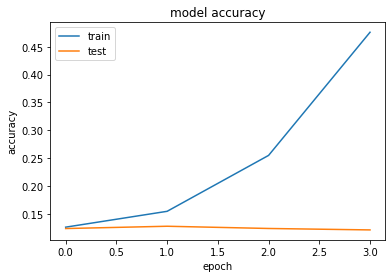

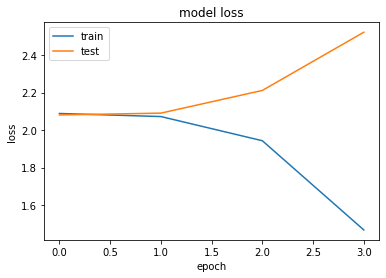

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 17s

 24/266 [=>............................] - ETA: 0s 

 45/266 [====>.........................] - ETA: 0s

 65/266 [======>.......................] - ETA: 0s

 86/266 [========>.....................] - ETA: 0s

107/266 [===========>..................] - ETA: 0s

129/266 [=============>................] - ETA: 0s

151/266 [================>.............] - ETA: 0s

173/266 [==================>...........] - ETA: 0s

195/266 [====================>.........] - ETA: 0s

216/266 [=======================>......] - ETA: 0s

238/266 [=========================>....] - ETA: 0s

260/266 [============================>.] - ETA: 0s

266/266 [==============================] - 1s 2ms/step


In [23]:
predictions_cards = get_card_from_encoding(predictions)
true_cards = get_card_from_encoding(test_y)

compute_statistics(predictions_cards,true_cards)

{'name': UUID('ca8a5d53-1207-4a9f-9f7f-399c173d1fd1'),
 'invested': '£850,900.00',
 'single_bet_amount': '£100.00',
 'total_invested': '£850,900.00',
 'total_won': 1033,
 'precentage_won': 12.140086966741098,
 'expected_won': 12.5,
 'eraned': '£516,500.00',
 'revenue': '-£334,400.00'}